# Основи використання API.
# Розроблення веб застосунків з використанням Flask та FastAPI.

<font color='DarkTurquoise'>

# 1. Доступ до даних в мережі Інтернет.</font>


В Python реалізовано багато засобів (бібліотек, пакунків модулів, окремих модулів) для доступу до даних в мережі Інтернет. Засоби, які входять у стандартну бібліотеку ([urllib](https://docs.python.org/3/library/urllib.html)) та засоби сторонніх розробників ([requests](https://requests.readthedocs.io/en/latest/)) дозволяють у найбільш загальному випадку отримати вміст html сторінки. Якщо не існує іншої можливості доступу до даних або свідомо обрано такий спосіб доступу то виникає потреба в розборі html файлу - видалення розмітки та добування вмісту (тексту, зображень тощо). В Python так само є достатньо засобів для здійснення такого розбору. Наприклад, бібліотеки та модулі lxml, beautifulsoup, html дозволяють робити це ефективно.

Більш зручно отримати дані з мережі Інтернет можна з використанням API, які надають власники цих даних. Що ж таке API?

<font color='DarkTurquoise'>

## Application Programming Interface (API)</font>

Згідно [Wikipedia](https://uk.wikipedia.org/wiki/%D0%9F%D1%80%D0%B8%D0%BA%D0%BB%D0%B0%D0%B4%D0%BD%D0%B8%D0%B9_%D0%BF%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BD%D0%B8%D0%B9_%D1%96%D0%BD%D1%82%D0%B5%D1%80%D1%84%D0%B5%D0%B9%D1%81):

***Прикладни́й програ́мний інтерфе́йс (англ. Application Programming Interface, API)*** — набір визначень підпрограм, протоколів взаємодії та засобів для створення програмного забезпечення.

Спрощено — це набір чітко визначених методів для взаємодії різних компонентів. Ви точно використовуєте API постійно, але не помічаєте цього. Наприклад, коли пересилаєте картинки з одного месенджера до іншого або швидко реєструєтесь на новому сайті через Facebook.

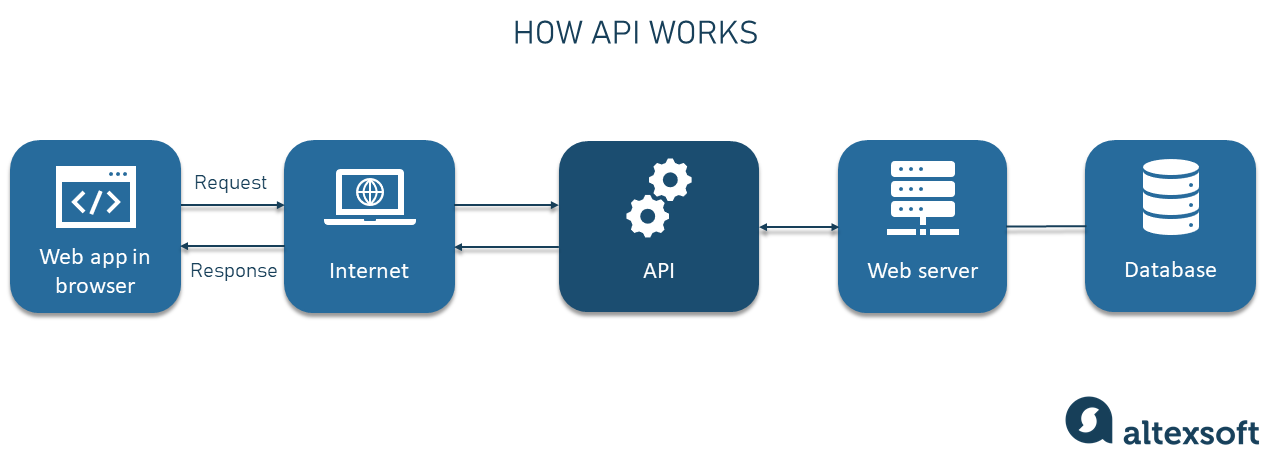

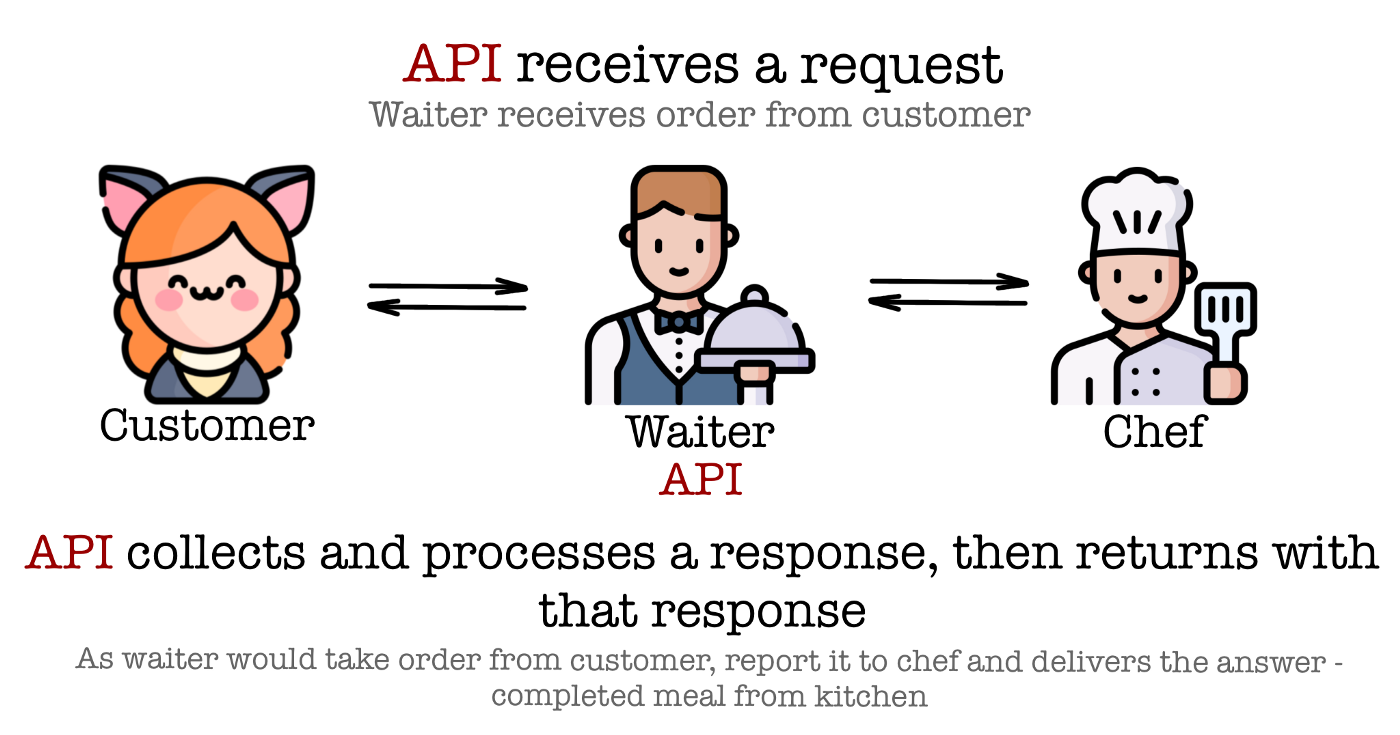

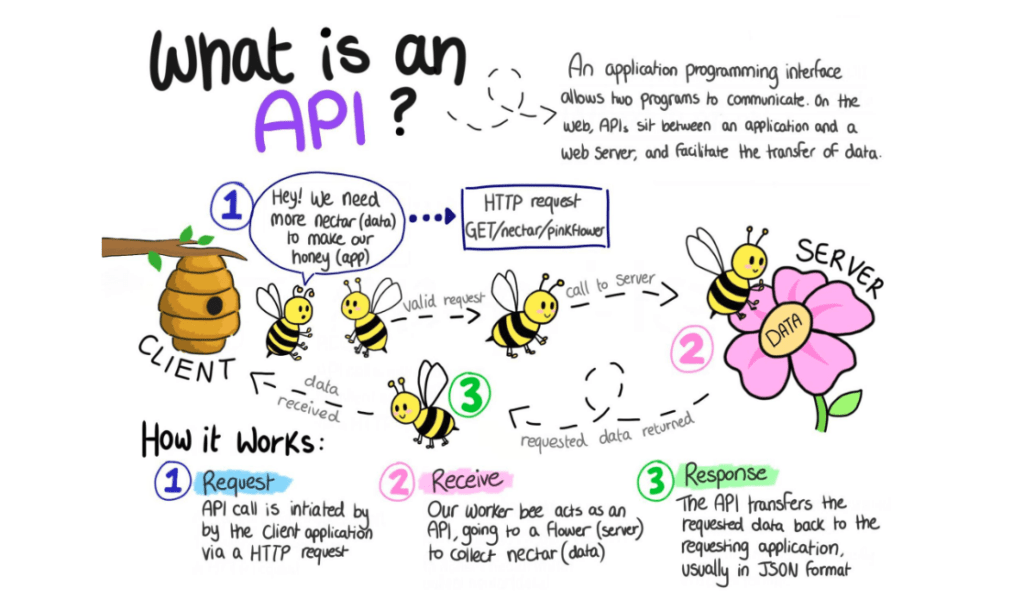

<font color='DarkTurquoise'>

### Коли потрібно створювати API </font>

- Дуже багато даних і їх завантаження (FTP) складне та ресурсоємне.
- Користувачі потребують доступу до даних в реальному часі.
- Дані часто змінюються чи оновлюються.
- Користувачі потребують доступу тільки до частини даних в певний момент часу.
- Користувачам потрібно не тільки отримувати дані але й додавати дані, оновлювати дані та
видаляти дані.


Якщо розмір даних, відносно невеликий (GB), то, найчастіше, дані будуть надані у форматі JSON (JavaScript Object Notation), який зручний як для читання так і для розбору за допомогою модуля стандартної бібліотеки json.

**JSON (JavaScript Object Notation, запис об'єктів JavaScript, вимовляється джейсон)** —це текстовий формат обміну даними між комп'ютерами. JSON базується на тексті, може бути прочитаним людиною. Формат дозволяє описувати об'єкти та інші структури даних. Цей формат головним чином використовується для передачі структурованої інформації через мережу (майже те саме що словник в Python).

Для спрощення роботи з API розробляються допоміжні програми обгортки, які дозволяють скористатися відповідним API, але формування запитів та їх отримання дещо спрощено.


<font color='DarkTurquoise'>

# 2. Обробка даних з мережі Інтернет.</font>

Незалежно від того у який спосіб отримані дані чи за допомогою оригінального API чи за допомогою програми оболонки у більшості випадків дані будуть отримані в JSON форматі.
Формат JSON це вже стандарт для обміну інформацією, який використовується з метою передачі даних в мережі інтернет чи збереження даних локально. Для роботи з цим форматом стандартна бібліотека Python надає відповідний модуль json.


Основні дії які дозволяє виконувати цей модуль це:

- серіалізація (перетворення на послідовність байтів) - кодування призначене для
перетворення даних на JSON (запис даних на диск)
- десеріалізація (декодування) - читання JSON (зчитування даних у пам'ять).

Для виконання цих дій використовують наступні методи:

- <code>dumps()</code> - кодування у JSON об'єкт (рядок)
- <code>dump()</code> - кодування в рядок, який буде збережено у файлі
- <code>loads()</code> - декодування JSON рядка
- <code>load()</code> - декодування при читанні JSON файла

При серіалізації Python об'єкти будуть перетворені у відповідні JSON об'єкти згідно настіпної таблиці.

Серіалізація (<code>dump</code>, <code>dumps</code>)

| Python                   | JSON | 
|--------------------------|----|
| dict                     | object | 
| list, tuple              | array| 
| str                      |string |
| int, float               |number| 
|True| true|
|False| false|
|None| null|


Десеріалізація (<code>load</code>, <code>loads</code>)
| JSON  | Python    |
|-------|-----------|
| object | dict      |
| array | list      |
|string | str       |
| number(int) |int|
| number(real) | float|
| true| True|
| false| False|
| null| None|

Наступний приклад демонструє простий варіант серіалізації Python об'єкту у файл:

In [1]:
import json
data = {
    "student" : {"name": "Arman",
    "species" : "Ca de Bou",
    "group": "noname"
    }
}
with open('student_list.json', 'w') as f:
    json.dump(data, f, indent=4)


та у рядок:

In [2]:
json_string = json.dumps(data, indent=4)
print(json_string)

{
    "student": {
        "name": "Arman",
        "species": "Ca de Bou",
        "group": "noname"
    }
}


При десеріалізація JSON об'єкти будуть перетворені у відповідні Python об'єкти згідно таблиці вище. При десеріалізації потрібно враховувати, що наведена вище таблиця не є оберненою таблицею перетворення об'єктів при серіалізації.


In [3]:
student = ('Arman', 'Ca de Bou')
encoded_student = json.dumps(student)
decoded_student = json.loads(encoded_student)
print(student == decoded_student)
print(type(student))
print(type(decoded_student))
print(student == tuple(decoded_student))

False
<class 'tuple'>
<class 'list'>
True


Якщо потрібно отримані дані, які збережені у форматі JSON то потрібно скористатися одним з двох методів модуля json,

In [5]:
help(json.load)

Help on function load in module json:

load(fp, *, cls=None, object_hook=None, parse_float=None, parse_int=None, parse_constant=None, object_pairs_hook=None, **kw)
    Deserialize ``fp`` (a ``.read()``-supporting file-like object containing
    a JSON document) to a Python object.
    
    ``object_hook`` is an optional function that will be called with the
    result of any object literal decode (a ``dict``). The return value of
    ``object_hook`` will be used instead of the ``dict``. This feature
    can be used to implement custom decoders (e.g. JSON-RPC class hinting).
    
    ``object_pairs_hook`` is an optional function that will be called with the
    result of any object literal decoded with an ordered list of pairs.  The
    return value of ``object_pairs_hook`` will be used instead of the ``dict``.
    This feature can be used to implement custom decoders.  If ``object_hook``
    is also defined, the ``object_pairs_hook`` takes priority.
    
    To use a custom ``JSONDecod

In [5]:
help(json.loads)

Help on function loads in module json:

loads(s, *, cls=None, object_hook=None, parse_float=None, parse_int=None, parse_constant=None, object_pairs_hook=None, **kw)
    Deserialize ``s`` (a ``str``, ``bytes`` or ``bytearray`` instance
    containing a JSON document) to a Python object.
    
    ``object_hook`` is an optional function that will be called with the
    result of any object literal decode (a ``dict``). The return value of
    ``object_hook`` will be used instead of the ``dict``. This feature
    can be used to implement custom decoders (e.g. JSON-RPC class hinting).
    
    ``object_pairs_hook`` is an optional function that will be called with the
    result of any object literal decoded with an ordered list of pairs.  The
    return value of ``object_pairs_hook`` will be used instead of the ``dict``.
    This feature can be used to implement custom decoders.  If ``object_hook``
    is also defined, the ``object_pairs_hook`` takes priority.
    
    ``parse_float``, if sp


У наступному прикладі показано використання функції <code>loads()</code> для роботи з рядком, який містить JSON. Потрібно звернути увагу на використання ключового параметра <code>object_hook</code> за допомогою якого можна задати спосіб обробки рядка. У прикладі значення цього рядка це функція, яка дозволяє на основі даних з рядка отримати комплексне число.

In [6]:
def as_complex(dct):
    if '__complex__' in dct:
        return complex(dct['real'], dct['imag'])
    return dct

json.loads('{"__complex__": true, "real": 1, "imag": 2}', object_hook=as_complex)

(1+2j)

Наступний приклад демонструє як використовувалася інша функція <code>load()</code> для того, щоб отримати дані з файлу <code>world.json</code> та визначити густоту населення в кожній з країн.

In [7]:
import json
import pprint
f = open('world.json', encoding = 'utf-8')
country_data = json.load(f)
for country in country_data['features']:
 pprint.pprint(country['properties']['NAME'])
 pprint.pprint(str(country['properties']['POP2005']/
                    country['properties']['AREA']))


'Antigua and Barbuda'
'1887.25'
'Armenia'
'1070.0925531914893'
'Albania'
'1150.9967153284672'
'Azerbaijan'
'1011.1405569007264'


З цього прикладу стає зрозуміло, що працювати з елементами json файлу можна як із елементами Python словника. Також потрібно звернути увагу на використання модуля <code>pprint</code> стандартної бібліотеки. Функція <code>pprint</code> модуля <code>pprint</code> дозволяє виводити структури даних Python у форматованому вигляді. Інші приклади роботи з json можна знайти в архіві <code>other.zip</code> в поточній теці

Також для роботи з JSON можна використовувати сторонні пакунки, наприклад <code>jmespath</code> (його використання не є обов'язковим для виконання завдань), який дозволяє здійснювати пошук значення в об'єкті за шаблоном.

<font color='DarkTurquoise'>

# 3. Використання API.</font>

API, який надає власник web-ресурсу це набір правил, яких повинен дотримуватися клієнт (інший веб застосунок) для того, щоб отримати доступ до тих чи інших даних. Для успішного використання API необхідно обов'язково ознайомитися з відповідною документацією, яку надає розробник API. Загальна схема роботи з API наступна:


- отримання базового URL (endpoint);
- формування запиту згідно API;
- надсилання запиту;
- обробка отриманих результатів запиту.

Допоміжні програми обгортки дозволяють більш спрощено формувати та надсилати запити, але не завжди забезпечуть всі можливості оригінального API.
Потрібно звернути увагу на те, що багато веб-ресурсів
вимагають від клієнтів для використання їх API надання API-ключа. API-ключ дозволяє контролювати використання API. За API-ключем можна відстежувати діяльність клієнта, накладати певні обмеження, встановлювати оплату.
Якщо для використання API потрібен API-ключ то його можна отримати згідно з визначеною власником API процедури. Надалі такий ключ використовується як частина запиту, або використовується як частина більш складної процедури.

Наприклад, для того щоб отримати доступ до даних соціальної мережі Spotify потрібно
використовувати SpotifyAPI. Для використання SpotifyAPI потрібно отримати API-ключ після проходження процедури реєстрації web-додатка, який передбачає використання API. Після цього кожен запит буде підписуватись за допомогою технології OAuth ([oauth](www.oauth.net)).

<font color='DarkTurquoise'>

## Використання SpotifyAPI у лабараторній №2</font>

!!! Перегляньте обов'язково [відео](https://www.youtube.com/watch?v=WAmEZBEeNmg)  про SpotifyAPI

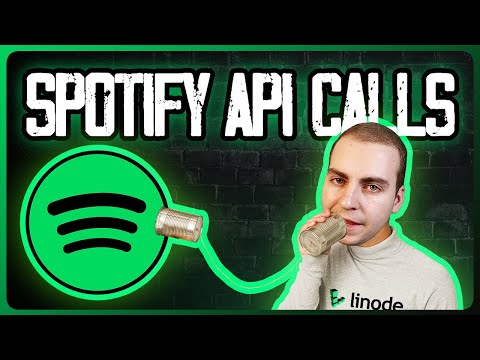

In [7]:
from IPython.display import YouTubeVideo

YouTubeVideo('WAmEZBEeNmg', width=672, height=378)

<font color='DarkTurquoise'>

# Розроблення веб застосунку з API за допомогою FastAPI.</font>

Для того щоб створити свій веб-застосунок на базі FastAPI, необхідно встановити такі залежності:
 - <code>fastapi</code>
 - <code>uvicorn</code>

Для цього слід виконати команду:

<code>pip install fastapi uvicorn</code>

In [8]:
!pip install fastapi uvicorn

Щоб створити простий вебсервер, достатньо створити модуль <code>main.py</code> з наступним вмістом:

In [9]:
from fastapi import FastAPI #імпорт модуля
app = FastAPI(title="Winged phrase") #оголошення об'єкта сервера

@app.get("/") #визначення базового URL - ендпоінта
async def root(): #функція для реалізації ендпоінта (викликатиметься під час звернення)
    return {"message": "Hello World"}

Для запуску сервера, в терміналі необхідно виконати:

<code>uvicorn main:app</code>


In [11]:
import uvicorn
!uvicorn main:app

INFO:     Started server process [5456]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
ERROR:    [Errno 10048] error while attempting to bind on address ('127.0.0.1', 8000): only one usage of each socket address (protocol/network address/port) is normally permitted
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.



Якщо модуль має іншу назву (не <code>main.py</code>), то в команді треба вказати цю назву (<code>uvicorn module_name:app</code>), де <code>module_name</code> - правильна назва модуля.

Якщо хочете запустити тут, то можете скористатися наступним кодом:

In [13]:
import nest_asyncio
import uvicorn

if __name__ == "__main__":
    nest_asyncio.apply()
    uvicorn.run(app)

INFO:     Started server process [18272]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
ERROR:    [Errno 10048] error while attempting to bind on address ('127.0.0.1', 8000): only one usage of each socket address (protocol/network address/port) is normally permitted
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.


AssertionError: 

Оскільки GET запити виконуються в браузері, для того, щоб подивитись на результат виконання надсилання запиту до сервера - необхідно перейти на http://127.0.0.1:8000/

Розширимо функціонал сервера, щоб можна було приймати інші типи запитів, та виконувати певні дії.
У модулі <code>db.py</code> визначимо функції для збереження, отримання та видалення крилатих фраз.

In [ ]:
import random

items = {}

def get_random_item():
    return random.choice(list(items.values()))

def add_item(phrase: dict):
     id = len(items) + 1
     phrase.update({"id": id})
     items[id] = phrase
     return phrase

def delete_item(id):
    if id in items:
        del items[id]
    else:
        raise ValueError("Phrase doesn`t exist")

Тепер відповідно варто внести зміни до модулю (<code>main_update.py</code>), додамо імпорти необхідних функцій та ендпоінти для сервера:

In [ ]:
from http.client import HTTPException
#from db import get_random_item, add_item, delete_item

@app.get("/get", response_description= "Winged phrase",
         description= "Get random phrase from database")
def get():
    try:
        phrase = get_random_item()
    except IndexError:
        raise HTTPException(404, "Phrase list is empty")
    return phrase

@app.post("/add", response_description= "Add phrase with id parameter")
def add(phrase: dict):
    phrase_out = add_item(phrase)
    return phrase_out

@app.delete("/delete", response_description= "Result of deletion")
def delete(id: int):
    try:
        delete_item(id)
        return {"message": "ok"}
    except ValueError as e:
        raise HTTPException(404, str(e))

In [ ]:
!uvicorn main_update:app

Для того, щоб надсилати запити, можна скористатись функціоналом модуля <code>requests</code>

Приклади запитів:
http://127.0.0.1:8000/get - запит для отримання випадкової фрази


In [ ]:
import requests

url =  "http://localhost:8000/get"
response = requests.request("GET", url)

print(response.text)

http://127.0.0.1:8000/add - запит для додавання фрази в словник.

Тіло запиту має містити JSON з бажаним текстом, наприклад <code>{“text” : “Random phrase 1”}</code>


In [ ]:
import requests
url = "http://localhost:8000/add"

payload = "{'text': 'Random phrase 1'}"
headers = {'Content-Type': 'application/json'}

response = requests.request("POST", url, headers=headers, data=payload)
print(response.text)

І останній відповідно запит для видалення:
http://127.0.0.1:8000/delete?id=1

In [ ]:
import requests
url =  "http://localhost:8000/delete?id=1"
response = requests.request("DELETE", url)
print(response.text)

<font color='DarkTurquoise'>

# 7. Розгортання веб-сервера на хмарному сервісі [PythonAnywhere](https://www.pythonanywhere.com/) </font>

Для того, щоб забезпечити доступ до веб-сервера його потрібно розгорнути (розмістити) в мережі Інтернет. Хмарний сервіс pythonanywhere дозволяє розмістити безкоштовно один веб застосунок. Для використання цього сервісу потрібно спочатку створити обліковий запис. Після цього потрібно виконати 7 кроків згідно з інструкцією по розміщенню вебсервера на цьому ресурсі.

Для розгортання веб застосунку, який розроблено з використанням FastAPI рекомендують використовувати сервіс [Deta](https://deta.space/from-cloud). Документація FastAPI містить докладну [інструкцію](https://fastapi.tiangolo.com/deployment/deta/) як це зробити.

# Література:

- [JSON](https://docs.python.org/3/library/json.html)
- [URLLIB](https://docs.python.org/3/library/urllib.html)
- [REQUESTS](https://requests.readthedocs.io/en/latest/)
- [PY4E](https://www.py4e.com/)
- [FastAPI](https://www.queworx.com/blog/why-you-should-try-fastapi/)